# 機器學習概念

在機器學習的歷史上，一共出現了兩種定義。

- 1956 年，開發了西洋跳棋AI 程序的Arthur Samuel 在標誌著人工智能學科誕生的達特茅斯會議上定義了“機器學習” 這個詞，定義為，“在沒有明確設置的情況下，使計算機具有學習能力的研究領域”。

- 1997 年，Tom Mitchell 提供了一個更現代的定義：“如果用P 來測量程序在任務T 中性能。若一個程序通過利用經驗E 在T 任務中獲得了性能改善，則我們就說關於任務T和性能測量P ，該程序對經驗E 進行了學習。”


例如：玩跳棋。

E = 玩很多盤跳棋遊戲的經驗

T = 玩跳棋的任務。

P = 程序將贏得下一場比賽的概率。

機器學習就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

做數據分析, 幾乎每一次都要讀入這些套件!

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Jupyter Notebook 互動
from ipywidgets import interact

# 用 Seaborn 畫圖, 並設好圖的大小
import seaborn as sns
sns.set(rc={'figure.figsize':(16,12)})

# 分類

一般來說，機器學習問題都可以分到以下大類中的一個：

1. 監督式學習(Supervised Learning)：我們教電腦去做某件事情
    - 分類(Classification)
        - 身份欺詐檢測(Identity fraud detection)
        - 圖像分類(Image classification)
        - 客戶保留(Customer retention)
        - 診斷(Diagonostics)
    - 迴歸(Regression)
        - 廣告受歡迎度預測(Advertising popularity prediction)
        - 天氣預報(Weather forecasting)
        - 市場預測(Market forecasting)
        - 估計預期壽命(Estimating life expectancy)
        - 人口成長預估(Population growth prediction)
2. 非監督式學習(Unsupervised Learning)：我們讓電腦自己學習
    - 降維(Dimensionality reduction)
        - 大數據可視化(Big data visualisation)
        - 有意義的壓縮(Meaningful compression)
        - 結構發現(Structure discovery)
        - 特徵啟發(Feature Elicitation)
    - 聚類(Clustering) 
        - 目標行銷(Targetted Marketing)
        - 推薦系統(Recommender Systems)
        - 顧客區隔(Customer Segmentation)
3. 強化學習(Reinforcement Learning)：在環境給予的獎勵或懲罰的刺激下改變行為
    - 即時決策(Real-time decisions)
    - 遊戲AI(Game AI)
    - 機器人導航(Robot Navigation)
    - 技能習得(Skill Acquisition)
    - 學習任務(Learning Tasks)


## 1. 監督式學習(supervised learning)

在監督式學習中，首先有一個數據集，並且已知正確的輸出是什麼，且輸入和輸出存在關聯。監督學習問題分為“迴歸 Regression”和“分類 Classification”問題。

在迴歸問題中，我們試圖預測連續輸出中的結果，這意味著我們試圖將輸入變數映射到某個連續函數。例如給定一個人的某個資料，根據資料預測糖尿病發病情況，這就是一個迴歸的問題。


<p align='center'>
<img src='Linear_regression.svg'>
</p>


在分類問題中，我們試圖預測離散輸出中的結果。換句話說，我們試圖將輸入變量映射到離散類別中。例如給予患有腫瘤的患者，我們必須預測腫瘤是惡性的還是良性的。

<p align='center'>
<img src='Kernel_Machine.svg'>
</p>

In [2]:
# 導入需要套件
%matplotlib inline
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Automatically created module for IPython interactive environment


In [3]:
# 載入糖尿病資料集
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# 資料前處理
# 只使用其中一個特徵bmi(身體質量指數)
diabetes_X = diabetes_X[:, np.newaxis, 2]

# 分割特徵資料成訓練資料集與測試資料集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# 分割目標資料成訓練資料集與測試資料集
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [4]:
# 建立線性迴歸模式
regr = linear_model.LinearRegression()

# 以訓練資料集訓練模式
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [5]:
# 以測試資料集預測
diabetes_y_pred = regr.predict(diabetes_X_test)

# 輸出迴歸係數
print('Coefficients: ', regr.coef_)
# 輸出均方差
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# 輸出決定係數r2: 1 為完美解釋
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients:  [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


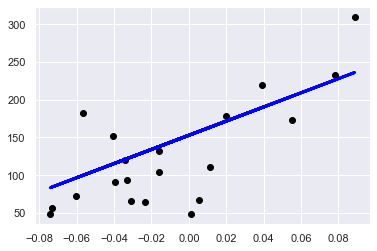

In [6]:
# 畫出視覺化展示圖形
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

## 2. 無監督式學習(unsupervised learning)

無監督學習使我們能夠很少或根本不知道我們的結果應該是什麼樣子。我們可以從數據中得出結構，我們不一定知道變量的影響。我們可以通過基於數據中變數之間的關係對數據進行分群來推導出這種結構。在無監督學習的情況下，沒有基於預測結果的反饋。無監督學習可以分為“分群”和“降維”。

分群(clustering)：獲取1,000,000個不同基因的集合，並找到一種方法將這些基因自動分組成不同變數的相似或相關的組，例如壽命，位置，角色等。


<p align='center'>
<img src='KMeans-Gaussian-data.svg'>
</p>


降維：在某些限定條件下，降低隨機變數個數，得到一組「不相關」主變數的過程。

## K-Means 會自動分類！

我們介紹一個很好用的 unsupervised learning, 叫 K-Means。我們可以指定把我們資料分成幾類, 然後它就會快速分好!
#### 隨便生個 100 點

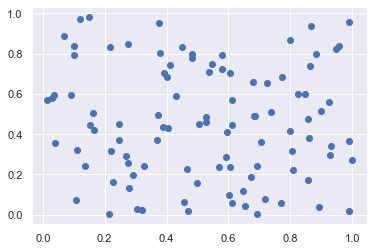

In [7]:
x = np.random.rand(100,2)
plt.scatter(x[:,0], x[:,1], cmap='Paired')

#### step 1. 製做一個 K-Means 分類器
記得要告訴 K-Means 要分成幾類 (我們這裡是 3 類)。

In [8]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)

#### step 2. fit 學習、訓練

注意這時沒有「正確答案」。

In [9]:
clf.fit(x)

KMeans(n_clusters=3)

#### step 3. predict

分類好的其實已經放在神秘的 `label_` 了。

In [10]:
clf.labels_

array([2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0])

當然我們還是有 `predict`, 所以也可以用 `predict`算。

In [11]:
clf.predict(x)

array([2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0])

用圖來看看分得怎麼樣。

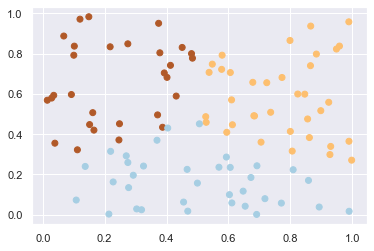

In [12]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

來看看我們最愛的呈現方式...

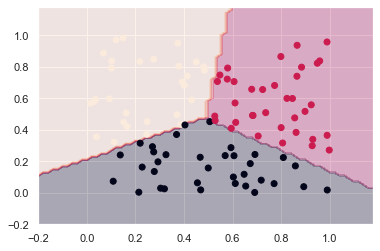

In [13]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)
plt.scatter(x[:,0], x[:,1], c=clf.labels_)